# "Discriminative Protein Expression Analysis for Multi-Class Classification in Down Syndrome"

<center><img src= "https://th.bing.com/th/id/OIP.EtZN20Ejv2CNBfebZjA6pAHaEz?rs=1&pid=ImgDetMain" alt ="mouse" style='width: 800px;'></center>

**Context**


*A cohort of 8 groups of control and Down syndrome mice underwent fear conditioning to examine alterations in cerebral cortex protein expression.
To investigate the impact of Down syndrome on associative learning, protein levels were evaluated in the brain's outermost layer of eight mouse groups exposed to a fear conditioning protocol*



**Dataset Description**

*The dataset comprises quantitative measurements of 77 distinct proteins and their modified forms within the nuclear compartment of the cortical region. These measurements were derived from a total of 72 subjects, divided into two groups: 38 typical mice and 34 mice modeling Down syndrome. Each subject contributed 15 data points for each protein, resulting in 570 and 510 measurements for typical and Down syndrome mice, respectively. Consequently, the dataset encompasses 1080 data points per protein, with each data point representing an independent experimental unit equivalent to one mouse.*

*The experimental subjects were categorized into eight subgroups based on genetic makeup, behavioral exposure, and pharmacological intervention. Genetic constitution was classified as either typical or Down syndrome. Behavioral exposure involved either a learning-inducing stimulus or its absence. Finally, to assess the potential ameliorative effects of memantine on learning deficits in the Down syndrome model, a subset of mice received the drug while others did not.*



# Exploratory Data Analysis

## Aim :
- Understanding the data
- Begin to develop a modelling strategy

## Target
Classes:

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
    
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
    
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
    
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
    
t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
    
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
    
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
    
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

## Features

[1] Mouse ID

[2:78] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. For example: DYRK1A_n

[79] Genotype: control (c) or trisomy (t)

[80] Treatment type: memantine (m) or saline (s)

[81] Behavior: context-shock (CS) or shock-context (SC)

[82] Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

## Base Checklist
#### Shape Analysis :
- **target feature** : Class
- **rows and columns** : 1080 , 82
- **features types** : qualitatives : 5 , quantitatives : 77
- **NaN analysis** :
    - NaN (5 features > 15 % of NaN (all others < 5%))

#### Columns Analysis :
- **Target Analysis** :
    - Balanced (Yes/No) : Yes
    - Percentages : ~12.5% for each class
- **Categorical values**
    - There is 4 categorical features (not including the target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\YASHAS\mice_expression\research\Data_Cortex_Nuclear.csv')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698   
1  0.172817   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987   
2  0.175722   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002   
3  0.176463   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087   
4  0.173627   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.296927  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366   
1  0.281319  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659   
2  0.281710  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329   
3  0.313832  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705   
4  0.277964  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.416289  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526   
1  0.400364  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727   
2  0.399847  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614   
3  0.385639  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536   
4  0.367531  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.319677  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539   
1  0.304419  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560   
2  0.311747  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005   
3  0.279218  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211   
4  0.273667  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755   

      P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N  \
0  0.335336  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571   
1  0.324835  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959   
2  0.324852  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086   
3  0.330121  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492   
4  0.313415  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206   

    TIAM1_N  pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N  \
0  0.482864  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700   
1  0.454519  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060   
2  0.447197  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881   
3  0.442650  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382   
4  0.419095  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829   

       S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N  \
0  0.354605  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989   
1  0.354548  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471   
2  0.386087  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330   
3  0.290680  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656   
4  0.309345  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983   

     nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  \
0  0.176668  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538   
1  0.178309  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632   
2  0.176213  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343   
3  0.163804  0.123210  0.117439  0.234947  0.145068  0.430996  0

In [3]:
df.dtypes.value_counts() 

float64    77
object      5
Name: count, dtype: int64

In [4]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 1080 rows
There is 82 columns


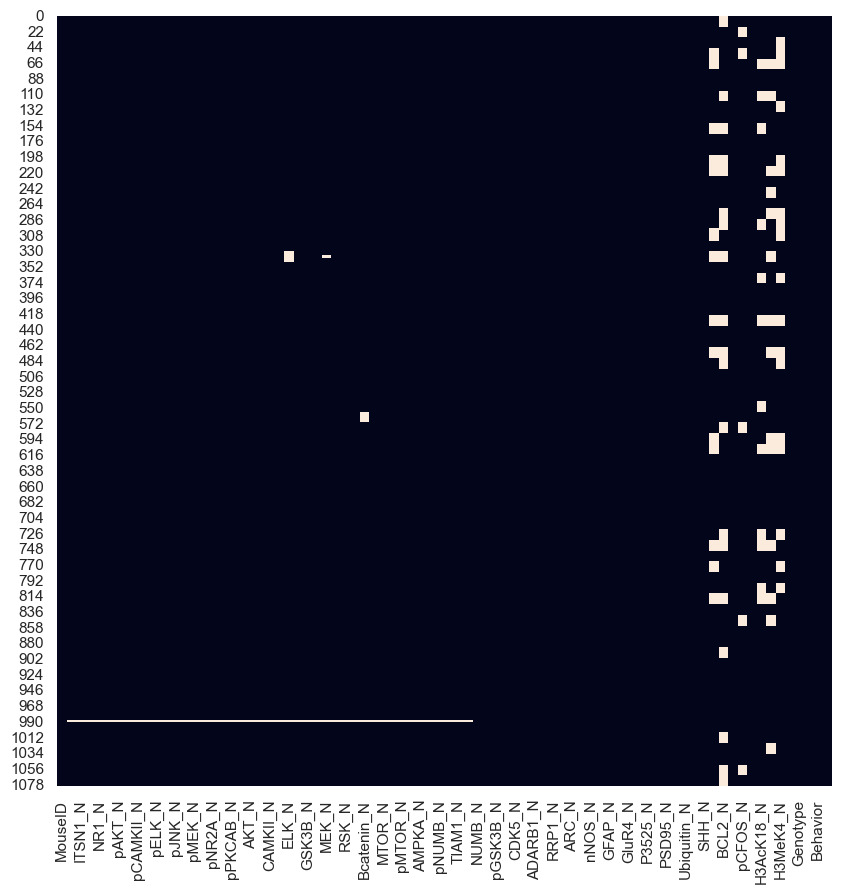

In [16]:

plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()

*calculating the percentage of missing values in each column of the DataFrame df and sorting them in descending order of the percentage of missing values.*

In [17]:

(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

BCL2_N             26.388889
H3MeK4_N           25.000000
BAD_N              19.722222
EGR1_N             19.444444
H3AcK18_N          16.666667
pCFOS_N             6.944444
Bcatenin_N          1.666667
ELK_N               1.666667
MEK_N               0.648148
pCAMKII_N           0.277778
pELK_N              0.277778
BDNF_N              0.277778
NR1_N               0.277778
NR2A_N              0.277778
pAKT_N              0.277778
pBRAF_N             0.277778
DYRK1A_N            0.277778
ITSN1_N             0.277778
MTOR_N              0.277778
pNR2B_N             0.277778
pNR1_N              0.277778
pNR2A_N             0.277778
PKCA_N              0.277778
pJNK_N              0.277778
pERK_N              0.277778
pMEK_N              0.277778
pCREB_N             0.277778
CREB_N              0.277778
ERK_N               0.277778
pPKCAB_N            0.277778
BRAF_N              0.277778
CAMKII_N            0.277778
AKT_N               0.277778
pRSK_N              0.277778
TIAM1_N       

 *filtering out columns in the DataFrame where less than 70% of the values are missing (NaN). It creates a new DataFrame df containing only the columns that meet this condition and then displays the first few rows of this new DataFrame.*

In [18]:
exploitable = df.columns[df.isna().sum()/df.shape[0]< 0.70 ]
df = df[exploitable]
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698   
1  0.172817   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987   
2  0.175722   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002   
3  0.176463   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087   
4  0.173627   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.296927  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366   
1  0.281319  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659   
2  0.281710  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329   
3  0.313832  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705   
4  0.277964  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.416289  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526   
1  0.400364  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727   
2  0.399847  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614   
3  0.385639  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536   
4  0.367531  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.319677  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539   
1  0.304419  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560   
2  0.311747  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005   
3  0.279218  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211   
4  0.273667  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755   

      P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N  \
0  0.335336  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571   
1  0.324835  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959   
2  0.324852  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086   
3  0.330121  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492   
4  0.313415  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206   

    TIAM1_N  pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N  \
0  0.482864  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700   
1  0.454519  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060   
2  0.447197  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881   
3  0.442650  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382   
4  0.419095  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829   

       S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N  \
0  0.354605  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989   
1  0.354548  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471   
2  0.386087  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330   
3  0.290680  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656   
4  0.309345  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983   

     nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  \
0  0.176668  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538   
1  0.178309  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632   
2  0.176213  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343   
3  0.163804  0.123210  0.117439  0.234947  0.145068  0.430996  0

## Examining target and features

*calculating the relative frequencies of each unique value in the 'class' column, which are then returned as a Series. The resulting Series shows the percentage of each unique value in the 'class' column.*

In [19]:
df['class'].value_counts(normalize=True)

class
c-CS-m    0.138889
c-SC-m    0.138889
c-CS-s    0.125000
c-SC-s    0.125000
t-CS-m    0.125000
t-SC-m    0.125000
t-SC-s    0.125000
t-CS-s    0.097222
Name: proportion, dtype: float64

*createing a grid of KDE plots for numerical columns in a DataFrame*

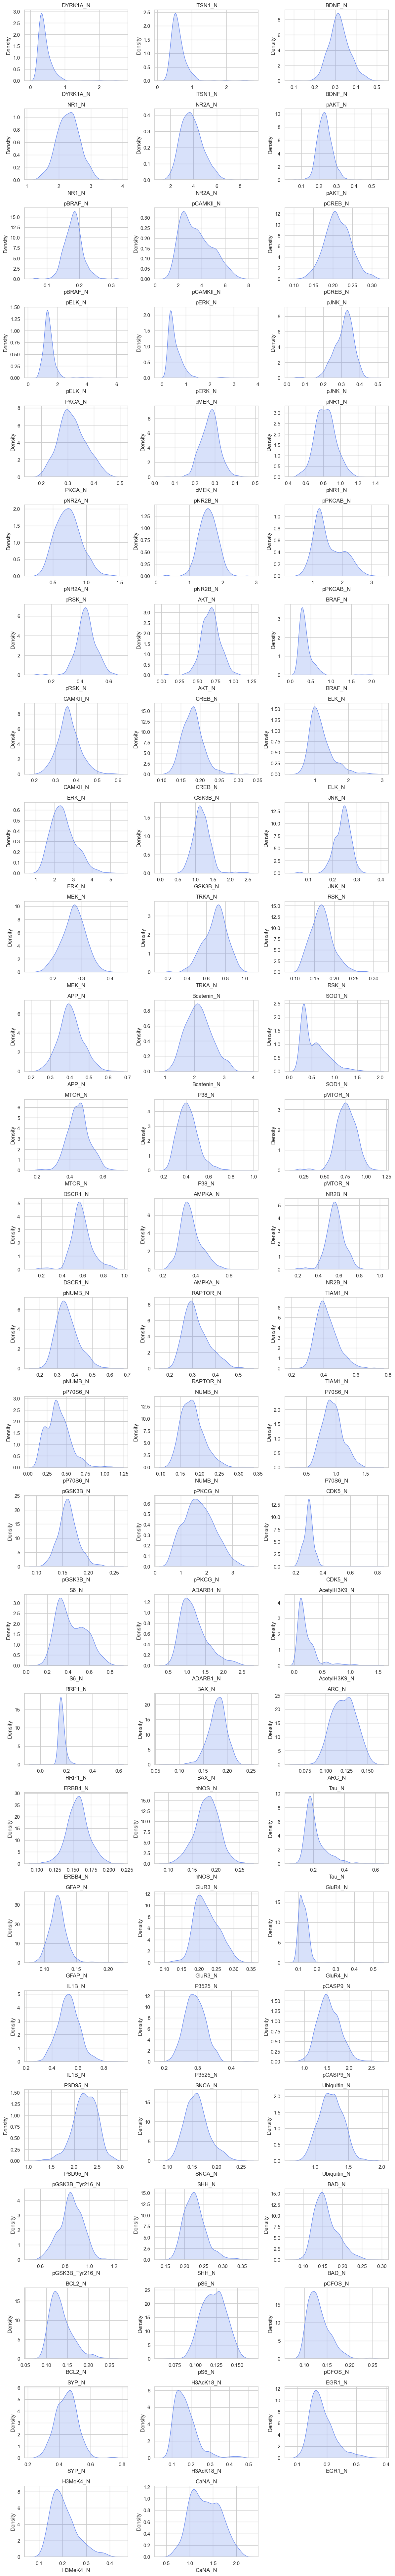

In [22]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_index = i % n_cols
    sns.kdeplot(df[col], ax=axes[row, col_index], shade=True)
    axes[row, col_index].set_title(col)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

*creating a pie chart of value counts for each unique value in the column, and displaying the plot.*

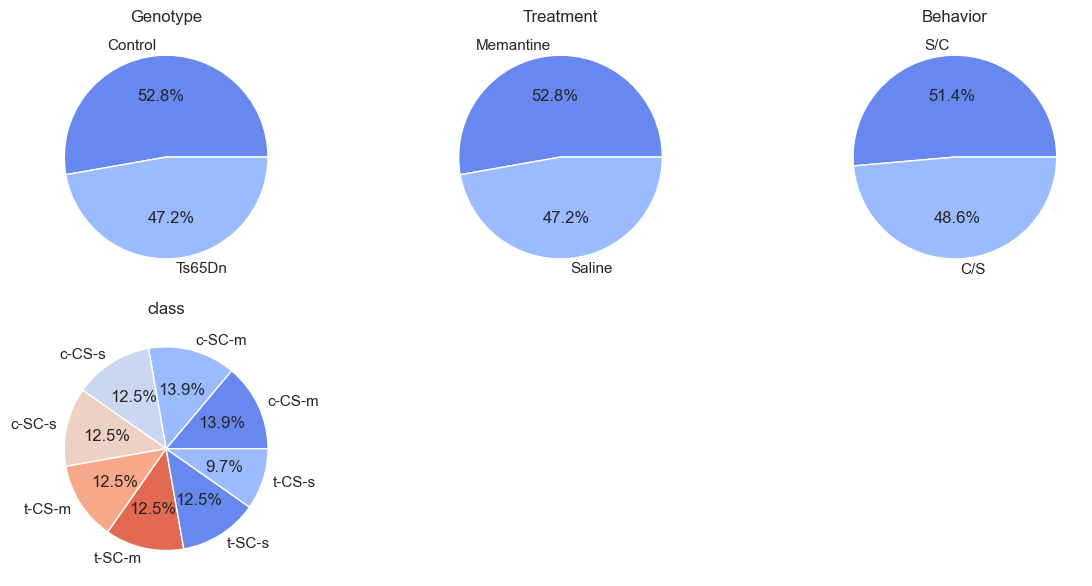

In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns.drop('MouseID')

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for i, col in enumerate(categorical_cols):
    row = i // n_cols
    col_index = i % n_cols
    df[col].value_counts().plot.pie(ax=axes[row, col_index], autopct='%1.1f%%')
    axes[row, col_index].set_ylabel('')
    axes[row, col_index].set_title(col)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

# Data Engineering

*For each column, we print the column name followed by the unique values in that column, aligned to the left with a minimum width of 50 characters.*

In [29]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50} {df[col].unique()}')

MouseID------------------------------------------- ['309_1' '309_2' '309_3' ... 'J3295_13' 'J3295_14' 'J3295_15']
Genotype------------------------------------------ ['Control' 'Ts65Dn']
Treatment----------------------------------------- ['Memantine' 'Saline']
Behavior------------------------------------------ ['C/S' 'S/C']
class--------------------------------------------- ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


*preparing a DataFrame for machine learning tasks by:* 
- Converting categorical values to numerical ones
- Filling missing values with column means
- Removing unnecessary columns like 'MouseID'

In [31]:
def encoding(df):
    code = {'Control':1,
            'Ts65Dn':0,
            'Memantine':1,
            'Saline':0,
            'C/S':0,
            'S/C':1,
            'c-CS-m':0,
            'c-SC-m':1,
            'c-CS-s':2,
            'c-SC-s':3,
            't-CS-m':4,
            't-SC-m':5,
            't-CS-s':6,
            't-SC-s':7,
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)
        
    return df

def imputation(df):
    df = df.fillna(df.mean())
    
    return df

def feature_engineering(df):
    useless_columns = ['MouseID']
    for feature in useless_columns:
        if feature in df:
            df = df.drop(feature,axis=1)
    return df

*preprocessesing the DataFrame by encoding categorical values, performing feature engineering, handling missing values, creating feature matrix X without the 'class' column, and assigning the 'class' column as the target variable y.*

In [35]:
def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('class',axis=1)
    y = df['class'].astype(int)
      
    return df,X,y
df=data.copy()
df,X,y = preprocessing(df)
df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

*creating subsets of a DataFrame df based on the values of a target variable y. The subsets are created by filtering the DataFrame for each unique value of y. The resulting subsets are assigned to variables c_CS_m, c_SC_m, c_CS_s, c_SC_s, t_cs_m, t_SC_m, t_CS_s, and t_SC_s. These subsets contain the rows of df where the target variable y has the corresponding value.*

In [36]:
c_CS_m = df[y == 0]
c_SC_m = df[y == 1]
c_CS_s = df[y == 2]
c_SC_s = df[y == 3]
t_cs_m = df[y == 4]
t_SC_m = df[y == 5]
t_CS_s = df[y == 6]
t_SC_s = df[y == 7]

# Detailed analysis

*calculating the Pearson correlation coefficients between all pairs of columns in a DataFrame df*
- 1 indicates a perfect positive linear relationship,
- -1 indicates a perfect negative linear relationship, and
- 0 indicates no linear relationship.


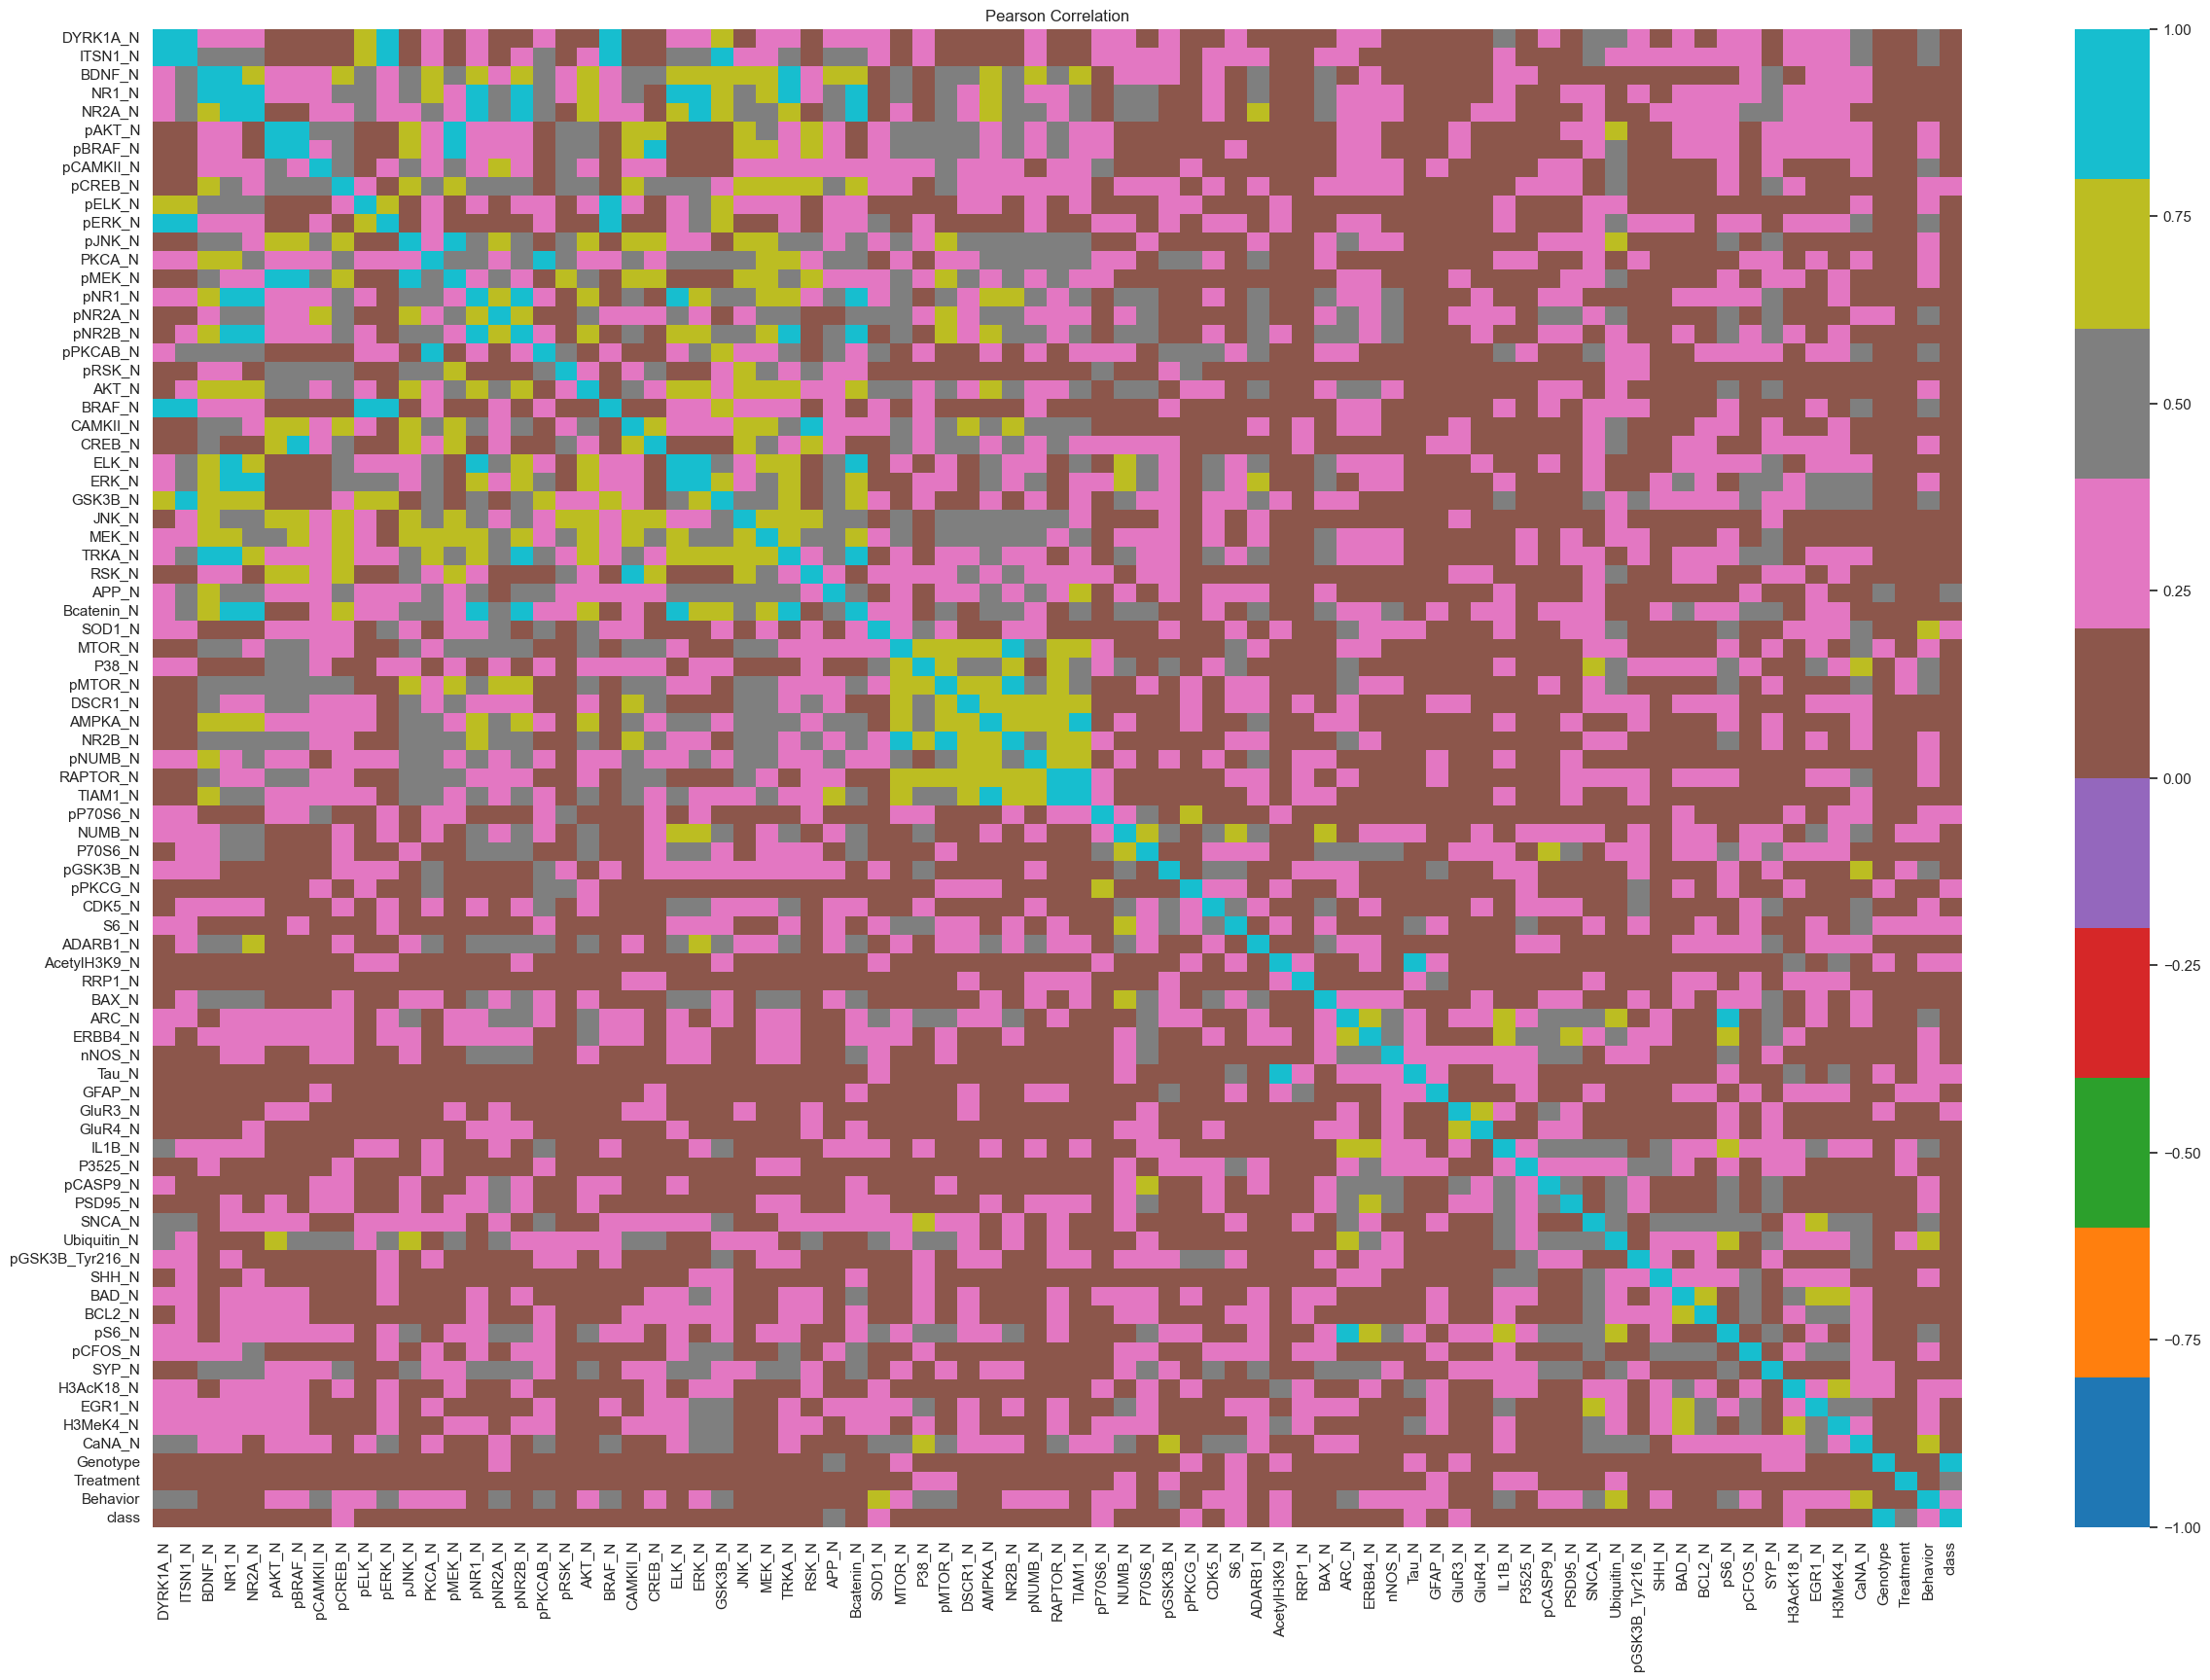

In [38]:
corr = df.corr(method='pearson').abs()

fig = plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=False, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

*calculating the absolute correlation values of each column in the DataFrame df with the column labeled 'class', and then sorting these correlation values in ascending order.*

In [39]:
df.corr()['class'].abs().sort_values()

DSCR1_N            0.000405
pBRAF_N            0.001241
JNK_N              0.011161
ELK_N              0.011574
pPKCAB_N           0.014082
P70S6_N            0.014352
pCASP9_N           0.017277
AKT_N              0.021164
GluR4_N            0.022090
SNCA_N             0.022768
RSK_N              0.023023
PSD95_N            0.023064
CAMKII_N           0.023299
pJNK_N             0.026123
nNOS_N             0.026994
DYRK1A_N           0.027169
BCL2_N             0.030229
PKCA_N             0.038828
BDNF_N             0.040251
CREB_N             0.041921
pCFOS_N            0.043059
pCAMKII_N          0.047267
ERBB4_N            0.055579
ARC_N              0.055598
pS6_N              0.055598
ITSN1_N            0.059088
Bcatenin_N         0.061481
pGSK3B_Tyr216_N    0.061832
SHH_N              0.067863
CaNA_N             0.068317
BAD_N              0.068883
GSK3B_N            0.070202
NR1_N              0.071079
TRKA_N             0.071720
BRAF_N             0.072357
RAPTOR_N           0

*visualizing multiple columns of a DataFrame by plotting their distributions using kernel density estimation plots in a grid layout. This allows for a quick comparison of the distributions of different columns in the DataFrame*

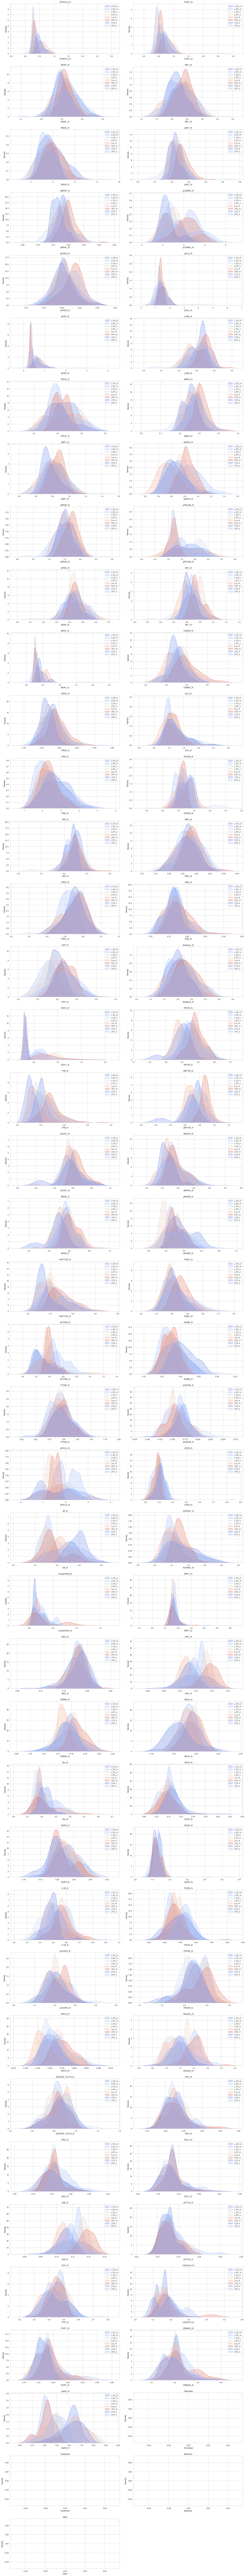

In [42]:
columns = df.columns

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

for i, col in enumerate(columns):
    row = i // n_cols
    col_index = i % n_cols
    sns.kdeplot(c_CS_m[col], ax=axes[row, col_index], label='c_CS_m', shade=True)
    sns.kdeplot(c_SC_m[col], ax=axes[row, col_index], label='c_SC_m', shade=True)
    sns.kdeplot(c_CS_s[col], ax=axes[row, col_index], label='c_CS_s', shade=True)
    sns.kdeplot(c_SC_s[col], ax=axes[row, col_index], label='c_SC_s', shade=True)
    sns.kdeplot(t_cs_m[col], ax=axes[row, col_index], label='t_cs_m', shade=True)
    sns.kdeplot(t_SC_m[col], ax=axes[row, col_index], label='t_SC_m', shade=True)
    sns.kdeplot(t_CS_s[col], ax=axes[row, col_index], label='t_CS_s', shade=True)
    sns.kdeplot(t_SC_s[col], ax=axes[row, col_index], label='t_SC_s', shade=True)
    axes[row, col_index].set_title(col)
    axes[row, col_index].legend()

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.show()

# Modelling

*splitting theDataFrame into a training and testing set, and printing the count of each class in the sets.*

In [43]:
from sklearn.model_selection import train_test_split
df = data.copy()
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
print(trainset['class'].value_counts())
print(testset['class'].value_counts())

class
c-CS-m    126
c-SC-m    125
t-SC-m    111
t-SC-s    109
c-CS-s    108
c-SC-s    104
t-CS-m    103
t-CS-s     78
Name: count, dtype: int64
class
t-CS-m    32
c-SC-s    31
t-CS-s    27
c-CS-s    27
t-SC-s    26
c-SC-m    25
t-SC-m    24
c-CS-m    24
Name: count, dtype: int64


In [44]:
_, X_train, y_train = preprocessing(trainset)
_, X_test, y_test = preprocessing(testset)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

*creating pipelines for different machine learning models using StandardScaler as a preprocessing step. Each pipeline consists of the StandardScaler followed by a specific classifier (e.g., PCA, RandomForest, AdaBoost, SVC, KNeighbors, Logistic Regression) for further processing. Each pipeline is set up with a specific random state for reproducibility*

In [46]:
preprocessor = make_pipeline(StandardScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=2,random_state=0))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

## PCA Analysis

*reduce the dimensionality of the data in X using PCA, combine the PCA results with the 'class' column from the original data, and display the first few rows of the combined DataFrame for analysis or visualization.*

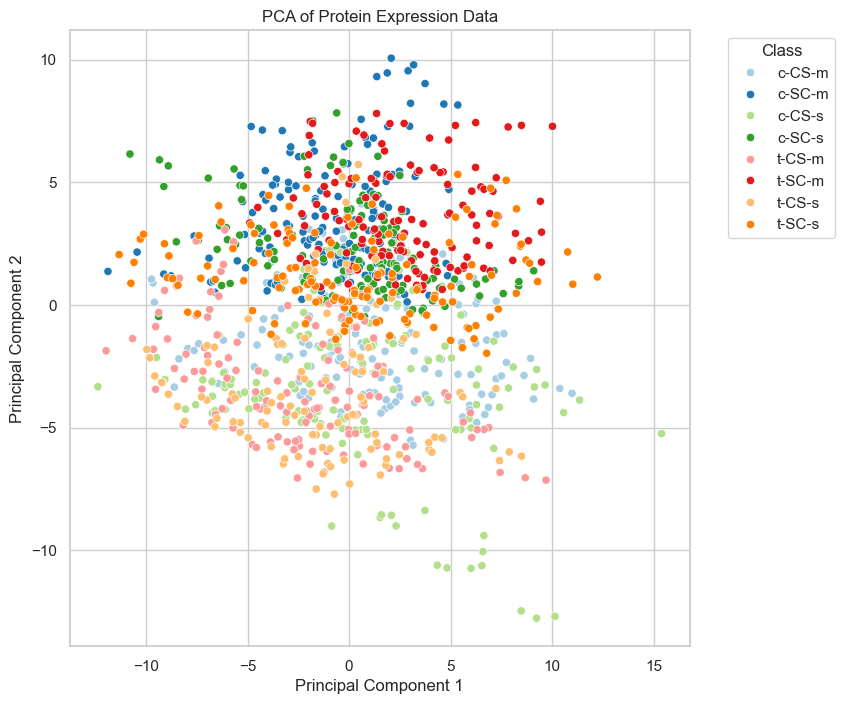

In [49]:

PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))

PCA_df = pd.concat([PCA_df, data['class']], axis=1)

PCA_df.columns = [f'PC{i+1}' for i in range(PCA_df.shape[1] - 1)] + ['class']

plt.figure(figsize=(8, 8))
sns.scatterplot(data=PCA_df, x='PC1', y='PC2', hue='class', palette=sns.color_palette("Paired", 8))
plt.title('PCA of Protein Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Classification problem

In [50]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

*evaluating the performance of a machine learning model. It fits the model to the training data, calculates the predicted probabilities, and then calculates the accuracy, confusion matrix, and classification report for the model's predictions on the test data. Additionally, it generates a learning curve plot to visualize the model's performance as a function of the training set size.*

In [51]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)

    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(8,6))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

---------------------------------
RandomForest
Accuracy =  1.0
-
[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        26

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

-
---------------------------------
AdaBoost
Accuracy =  1.0
-
[[

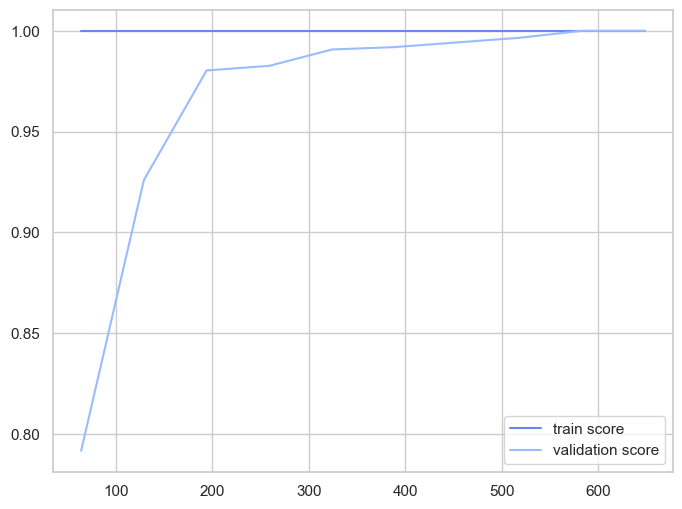

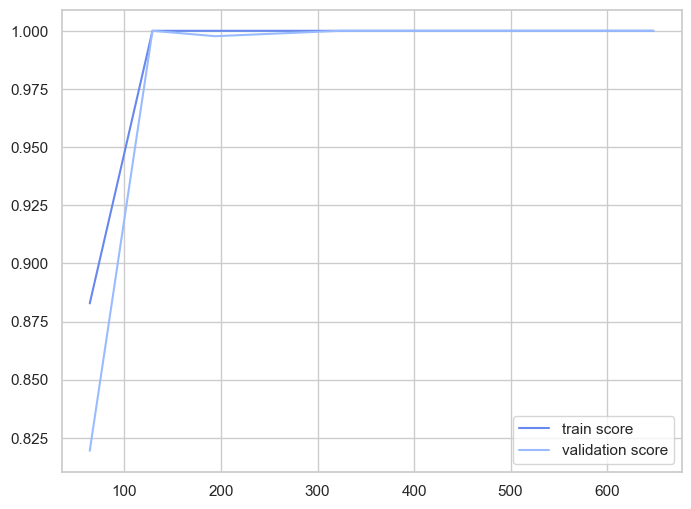

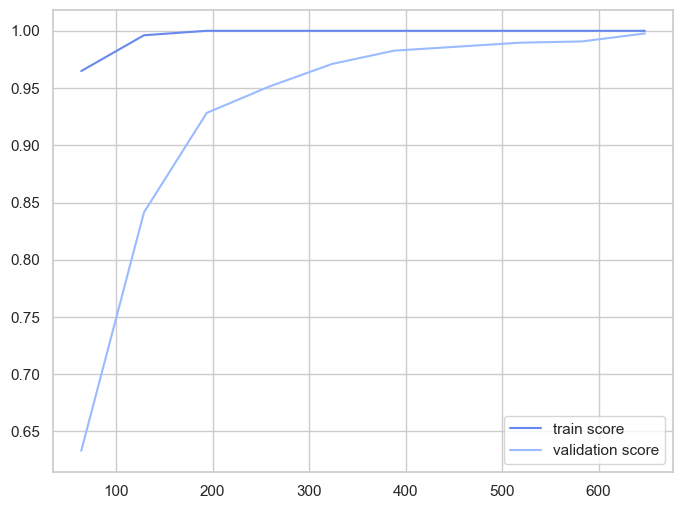

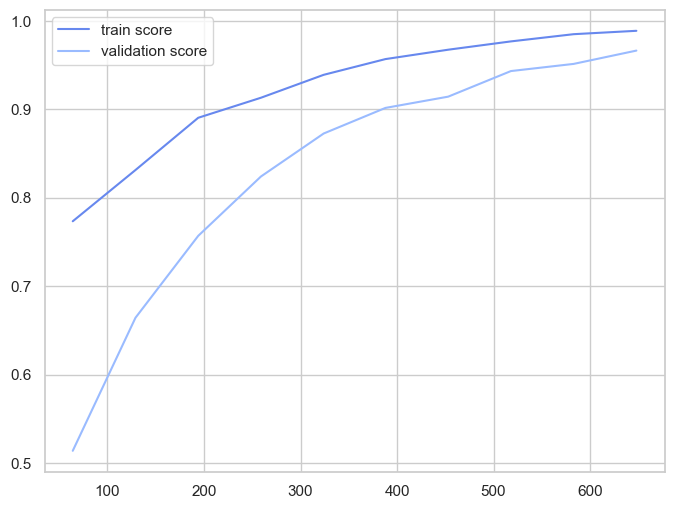

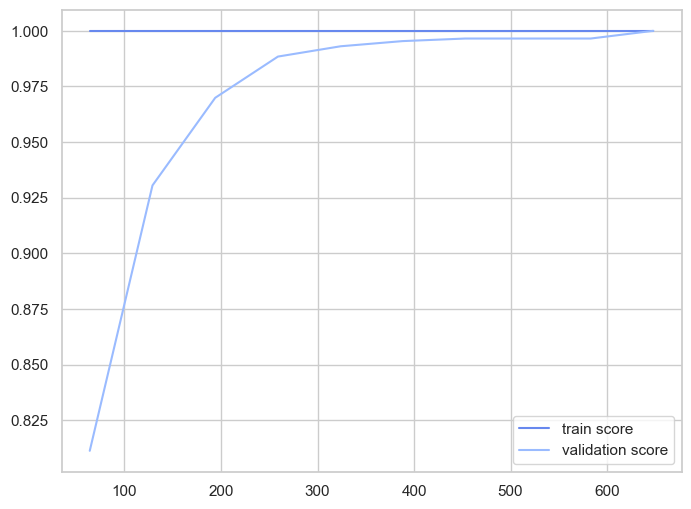

In [52]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

# 100% Accuracy on most models

For the 5 models tested hereabove, here are the accuracies :
- KNN : 98%
- SVM / RandomForest / Adaboost / LogisticRegression : 100%


## Visit my profile here:
- [Linkedin](https://www.linkedin.com/in/yashas-h-g-141a7726b/)
- [Github](https://github.com/Yashas-naidu/mice_expression)